# 30000 Spotify Songs Dataset

### 1) Definisati u 2-3 rečenice problem koji će se u projektu rešavati.
- Ovaj projekat će se baviti problemom praćenja trendova u muzici. Svodi se na predikciju popularnosti neke pesme po određenim karakteristikama koje je opisuju.

### 3) Jednom rečenicom objasniti šta predstavlja jedan uzorak u konkretnoj bazi.
- Jedan uzorak u bazi pretstavlja opšte informacije o pesmi dobijene sa aplikacije *Spotify*, njene karakteristike i informacije o njnoj uspešnosti.

### 5) Navesti sva obeležja.
- Id pesme (type:string)
- Ime pesme (type:string)
- Izvođač (type:string)
- Datum kada je podatak povučen sa Spotify API (type:string)
- Mera popularnosti date pesme u tom momentu (type:int)
- Bool vrednost koja govori da li pesma sadrži eksplicitan tekst (type:bool)
- Dužina pesme data u ms (type:int)
- Ime albuma (type:string)
- Ime playliste iz koje je povučena pesma (type:string)
- Id plazliste iz koje je povučena pesma (type:string)
- Datum kada je album objavljen (type:string)
- Mera koliko je pesma ritmična (type:float)
- Mera koliko je pesma energična (type:float)
- Tonalitet pesme (type:int)
- Glasnoća pesme (type:float)
- Broj koji predstavlja da li je pesma u duru ili molu (type:int)
- Mera prisustva izgovorenih reči u pesmi (type:float)
- Mera kvaliteta akustike u pesmi (type:float)
- Koliko ima čistog instrumentala u pesmi (type:float)
- Mera prisustva publike u pesmi (type:float)
- Mera toga koliko je pesma pozitivna (type:float)
- Tempo pesme dat u BPM (type:float)
- Vremenski potpis pesme (type:int)




In [26]:
import pandas as pd

songs = pd.read_csv('spotify_songs.csv')
songs.columns.size
print(songs['track_name'].value_counts())
print(songs['track_name'].unique())

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64
["I Don't Care (with Justin Bieber) - Loud Luxury Remix"
 'Memories - Dillon Francis Remix' 'All the Time - Don Diablo Remix' ...
 'Sweet Surrender - Radio Edit' 'Only For You - Maor Levi Remix'
 'Typhoon - Original Mix']


### 7) Ako ima kategoričkih obeležja, navesti koji od njih ima najmanji broj kategorija i koje su, i navesti ono koje ima najveći broj kategorija i koliko ih ima.
- Najmanji broj kategorija ima kategoričko obeležje mode koje nam govori da li je u duru ili u molu (0 ili 1). A najveći broj kategorija ima obeležje track_name koje ima 23449 kategorija.

In [27]:
songs['mode'].value_counts()

mode
1    18574
0    14259
Name: count, dtype: int64

### 9) Da li postoje obeležja u bazi koja smatraš da treba izbaciti iz baze? Koja su to i zašto smatraš da ih treba izbaciti? 
- track_id (Id pesme) - Nije nam potreban za bilo kakvu analizu i unikatan je za svaki primerak
- track_name (Ime pesme) - Ima previše unikatnih vrednosti pa nam nije od koristi u daljoj analizi
- track_artist (Izvođač pesme) - Bio bi preveliki bias prema određenim izvođačima. To je problem jer želimo da predviđamo uspeh i nepoznatih izvođača.
- track_album_id i track_album_name (Id albuma i ime albuma) tokođe nisu objektivni pokazatelji popularnosti neke pesme.
- playlist_name i playlist_id (Ime playliste i id playliste iz koje je uzeta pesma) - nisu nam potrebni za dalju analizu.

### 13) Kada je završeno izbacivanje, dopuna, i drugo, navesti koliko je u sređenoj bazi ostalo uzoraka, a koliko obeležja. 
- Ostaje nam 32833 uzoraka i 16 obeležja

In [28]:
# songs = songs[songs['track_popularity']>50]
print(len(songs))
new_df = songs.copy()

32833


In [33]:
# Assuming 'date' is a string column in the format 'YYYY-MM-DD'
new_df[['year', 'month', 'day']] = new_df['track_album_release_date'].str.split('-', expand=True)

# Convert the columns to numeric (to handle missing values during median calculation)
new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce', downcast='integer')
new_df['month'] = pd.to_numeric(new_df['month'], errors='coerce', downcast='integer')
new_df['day'] = pd.to_numeric(new_df['day'], errors='coerce', downcast='integer')

# Calculate median values for year, month, and day
median_year = int(new_df['year'].median())
median_month = int(new_df['month'].median())
median_day = int(new_df['day'].median())

# Fill missing values with median values
new_df['year'] = new_df['year'].fillna(median_year).astype(int)
new_df['month'] = new_df['month'].fillna(median_month).astype(int)
new_df['day'] = new_df['day'].fillna(median_day).astype(int)
coumns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'track_album_release_date', 'instrumentalness']
songs = new_df.copy()
songs.drop(columns=coumns_to_drop, inplace=True)
songs.dropna(inplace=True, axis=0)

playlist_gere_count = songs['playlist_genre'].value_counts()
playlist_subgenre_count = songs['playlist_subgenre'].value_counts() 


# songs = pd.get_dummies(songs, dtype=int)

print(songs['playlist_subgenre'].unique())

# songs['playlist_genre'] 
# songs['playlist_subgenre']





['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


In [30]:

y = songs['track_popularity']
x = songs.drop(columns=['track_popularity'])

### 15) Da li postoje parovi obeležja korelisani više od 0.7? Navesti takve parove obeležja. 
- Postoji samo jedna korelisanost blizu 0.7 a to je između loudness i energy (Glasnoće i Energičnosti) koja iznosi 0.68.

In [31]:
numerical_feats = ['danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'month', 'day', 'playlist_genre', 'playlist_subgenre']
dummy_feats = [feat for feat in x.columns if feat not in numerical_feats]
numeric_values = songs[numerical_feats]
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = numeric_values.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()
#TODO



ValueError: could not convert string to float: 'pop'

Column: danceability
Number of outliers: 99
Percentage of outliers: 0.71%



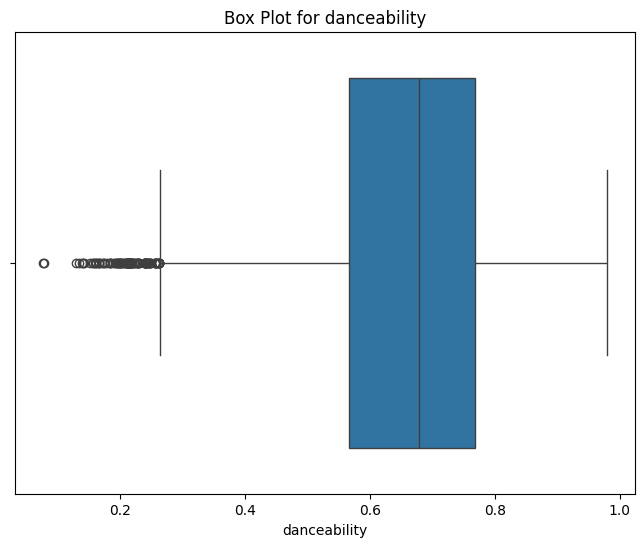

Column: energy
Number of outliers: 130
Percentage of outliers: 0.93%



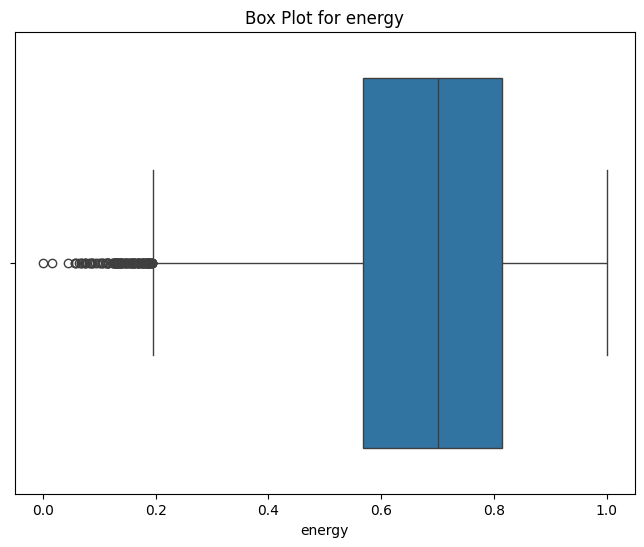

Column: loudness
Number of outliers: 515
Percentage of outliers: 3.69%



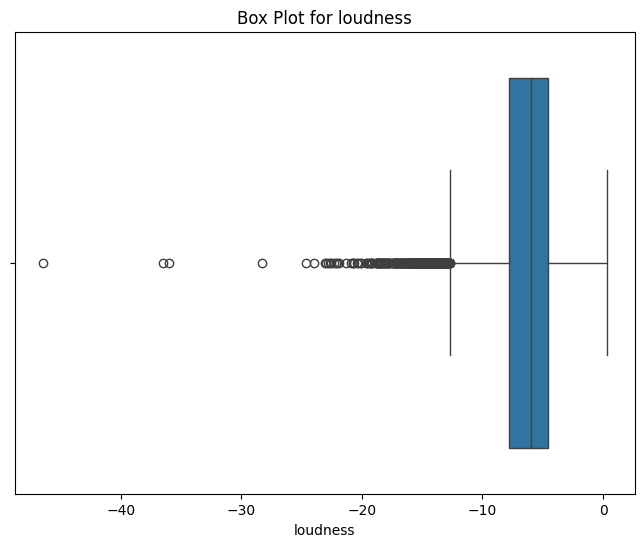

Column: speechiness
Number of outliers: 1354
Percentage of outliers: 9.70%



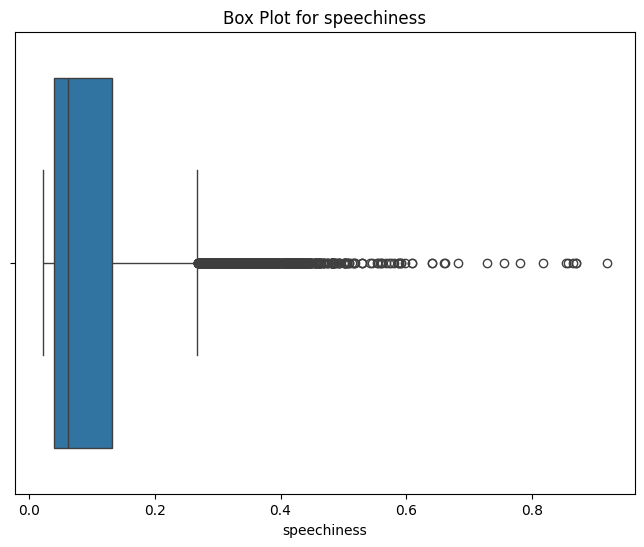

Column: liveness
Number of outliers: 744
Percentage of outliers: 5.33%



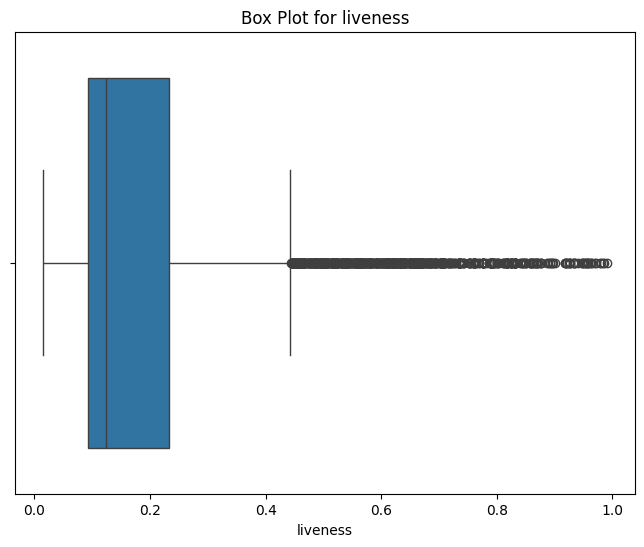

Column: valence
Number of outliers: 0
Percentage of outliers: 0.00%



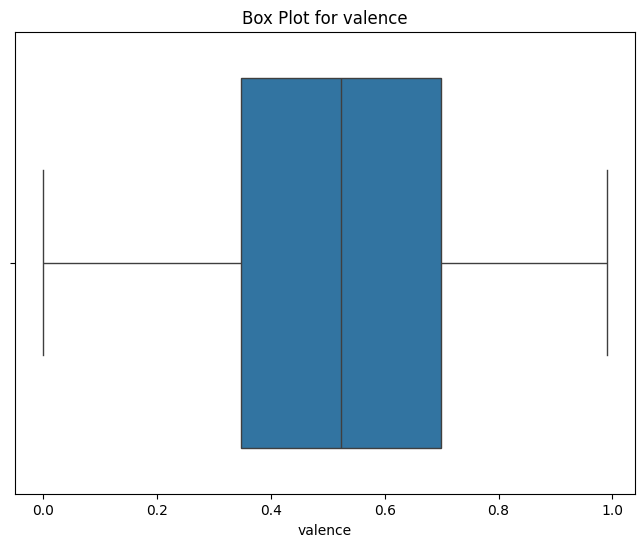

Column: tempo
Number of outliers: 102
Percentage of outliers: 0.73%



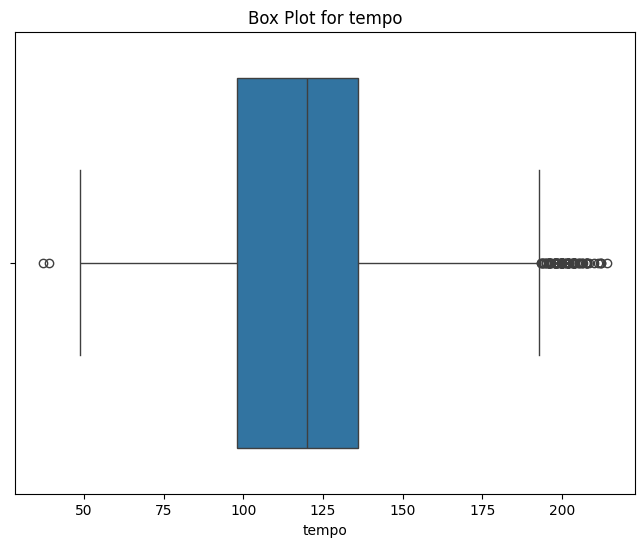

Column: duration_ms
Number of outliers: 509
Percentage of outliers: 3.65%



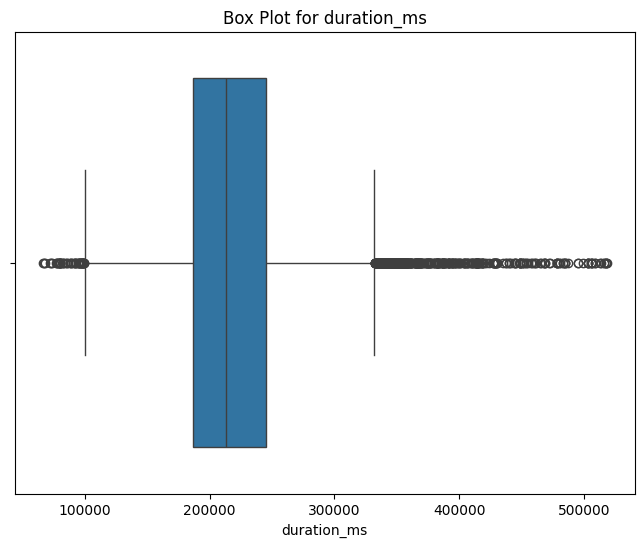

Column: year
Number of outliers: 1590
Percentage of outliers: 11.39%



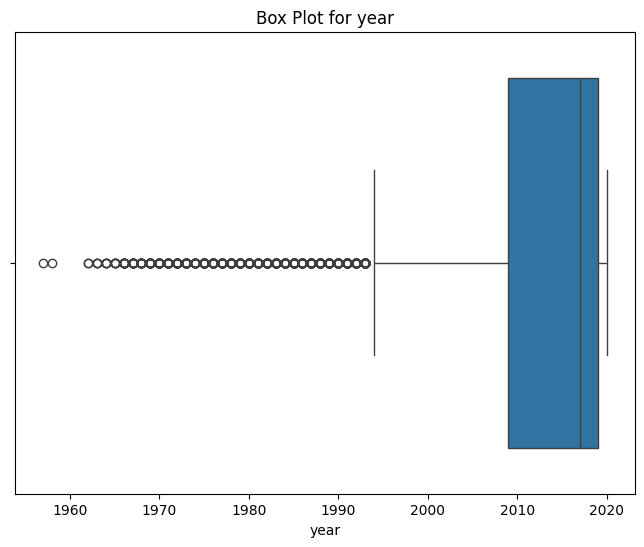

Column: month
Number of outliers: 0
Percentage of outliers: 0.00%



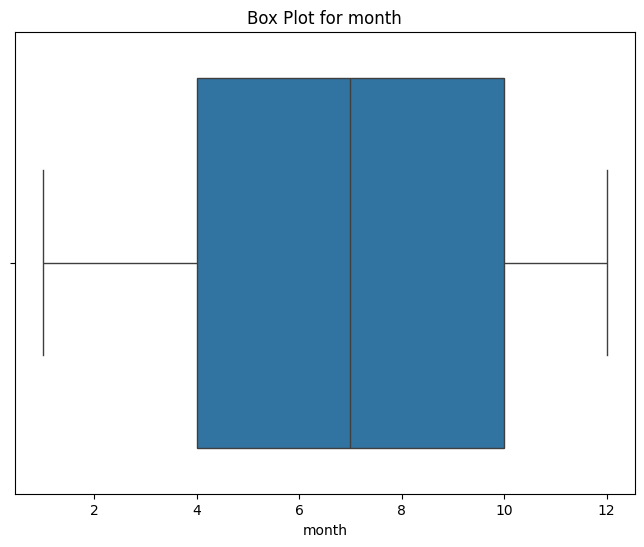

Column: day
Number of outliers: 0
Percentage of outliers: 0.00%



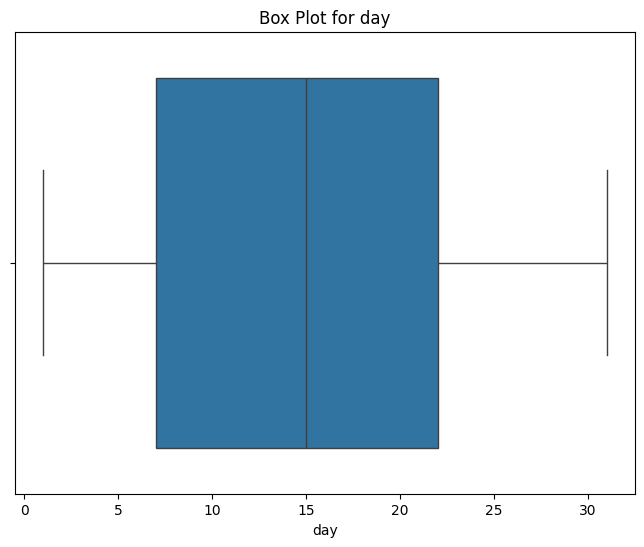

Column: playlist_genre
Number of outliers: 1545
Percentage of outliers: 11.07%



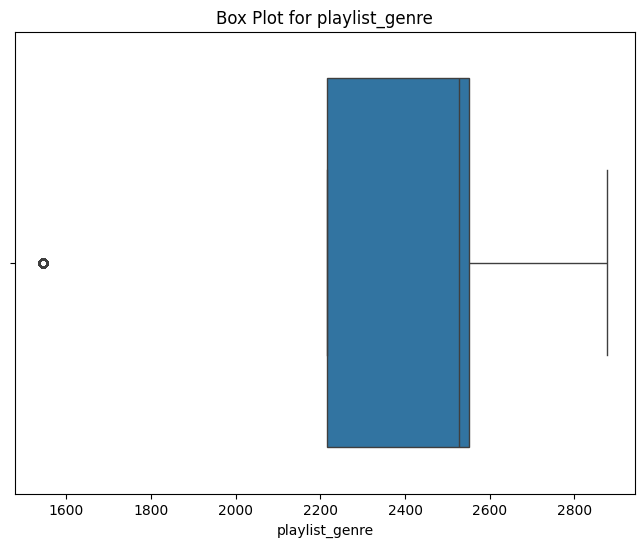

Column: playlist_subgenre
Number of outliers: 0
Percentage of outliers: 0.00%



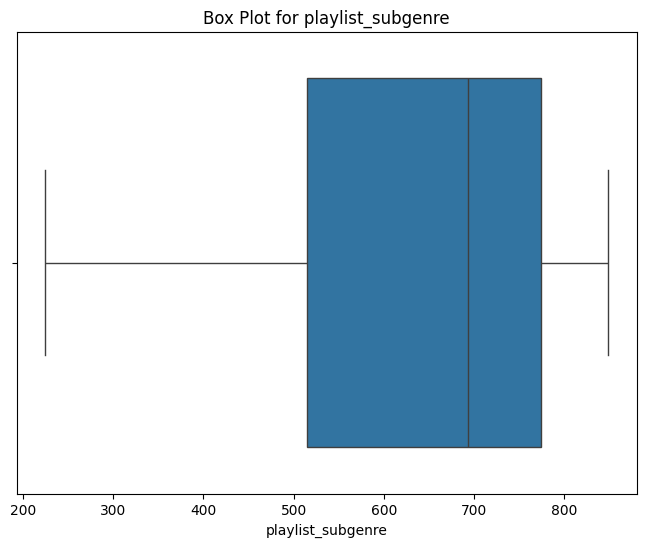

In [ ]:
for column in numeric_values:
    Q1 = songs[column].quantile(0.25)
    Q3 = songs[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers using the lower and upper bounds
    outliers = songs[(songs[column] < lower_bound) | (songs[column] > upper_bound)]

    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(songs)) * 100

    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

    # Optionally, you can visualize the outliers using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=songs[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
songs['key'].value_counts()

key
1     1737
0     1493
7     1320
9     1284
11    1259
5     1172
6     1140
2     1135
8     1128
10     998
4      937
3      359
Name: count, dtype: int64

In [ ]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets

In [ ]:
def standardizacija(x_train, x_test, numeric_feats, dummy_feats):
    # Save the original order of columns
    cols = x_train.columns
    
    # Standardize numeric features
    s = StandardScaler()
    s.fit(x_train[numeric_feats])
    
    x_train_std_numeric = s.transform(x_train[numeric_feats])
    x_test_std_numeric = s.transform(x_test[numeric_feats])
    
    x_train_std_numeric = pd.DataFrame(x_train_std_numeric, columns=numeric_feats)
    x_test_std_numeric = pd.DataFrame(x_test_std_numeric, columns=numeric_feats)

    # Concatenate standardized numeric features with dummy features
    x_train_std = pd.concat([x_train_std_numeric, x_train[dummy_feats]], axis=1)
    x_test_std = pd.concat([x_test_std_numeric, x_test[dummy_feats]], axis=1)

    return x_train_std_numeric, x_test_std_numeric

In [ ]:
def model_evaluation(y_test, y_predicted, N, d):
    mse = np.mean((y_test-y_predicted)**2)
    # mse = mean_squared_error(y_test,y_predicted)
    mae = np.mean(np.abs(y_test-y_predicted))
    # mae = mean_absolute_error(y_test,y_predicted)
    rmse = np.sqrt(mse)
    r2 = 1-np.sum((y_test-y_predicted)**2)/np.sum((y_test-np.mean(y_test))**2)
    # r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-((1-r2)*(N-1))/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))
    return mse,mae,rmse,r2,r2_adj

In [ ]:
# podela skupa na trening i test podatke

x_train_1, x_test, y_train_1, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, test_size=0.05, random_state=42)

x_train_std, x_val_std = standardizacija(x_train, x_val, numerical_feats, dummy_feats)

# x_train_std = x = x_train_std[['playlist_genre', 'month', 'danceability']]
# x_val_std = x = x_val_std[['playlist_genre', 'month', 'danceability']]


In [ ]:
print(len(songs['playlist_genre'].unique()), len(songs['playlist_subgenre'].unique()), len(songs['key'].unique()))
x_train_std.head()

6 24 12


,danceability,energy,loudness,speechiness,liveness,valence,tempo,duration_ms,year,month,day,playlist_genre,playlist_subgenre
0,-2.931041,-2.647993,-2.888012,-0.688472,-0.622826,-2.022398,-1.031962,1.990093,0.241572,-0.471489,0.469754,-0.490801,-1.620255
1,0.923358,-0.999490,0.115465,-0.675589,-0.678156,1.187201,-0.961411,0.886686,0.564224,-0.751019,0.579545,0.397143,0.299553
2,-1.109209,-2.215972,-1.458103,-0.753878,0.501740,-0.764404,-1.858609,1.166474,0.483561,0.367101,1.128503,-0.406485,-1.365896
3,-0.205090,0.228360,1.220124,-0.740004,-0.210624,-0.346831,-0.565098,-0.271216,0.644887,-1.030549,-0.737954,-2.256147,-2.419670
4,1.446795,0.046457,0.046270,0.068647,0.453327,0.936657,-0.924307,0.142888,0.160910,-1.589609,-1.506495,0.397143,-0.118323


In [ ]:
poly = PolynomialFeatures(interaction_only=False, degree=3, include_bias=True)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_val = poly.transform(x_val_std)
out_feat_names = PolynomialFeatures.get_feature_names_out(poly,input_features=None)

Mean squared error:  85.42275171937524
Mean absolute error:  7.472396668686717
Root mean squared error:  9.242442951913484
R2 score:  0.142354787174794
R2 adjusted score:  0.10245768473401362
     y     y_pred
0   53  73.313262
1   66  59.690585
2   54  65.719431
3   59  63.918319
4   53  58.950248
5   65  66.031289
6   67  65.581720
7   62  59.200813
8   69  58.435000
9   65  62.297859
10  70  68.204845
11  60  67.285958
12  54  61.022606
13  64  65.739031
14  52  72.811680
15  64  75.078117
16  58  64.545191
17  58  61.298065
18  84  60.626228
19  65  67.466409
koeficijenti:  [ 0.00000000e+00  1.82298535e-01 -2.05872209e+00  2.27742071e+00
 -3.87438099e-01  3.30480941e-01 -0.00000000e+00 -1.08841305e-01
  2.02686140e-01  2.22176137e+00  0.00000000e+00 -2.81162325e-01
 -6.90107027e-01  2.13787073e+00  3.86942591e-02 -9.79375494e-02
  1.86423236e-01 -5.30091259e-02  1.21948881e-01  4.94529350e-02
 -3.49562715e-01  1.32798807e-01  1.17539319e+00  0.00000000e+00
 -3.20974985e-02 -1.70929

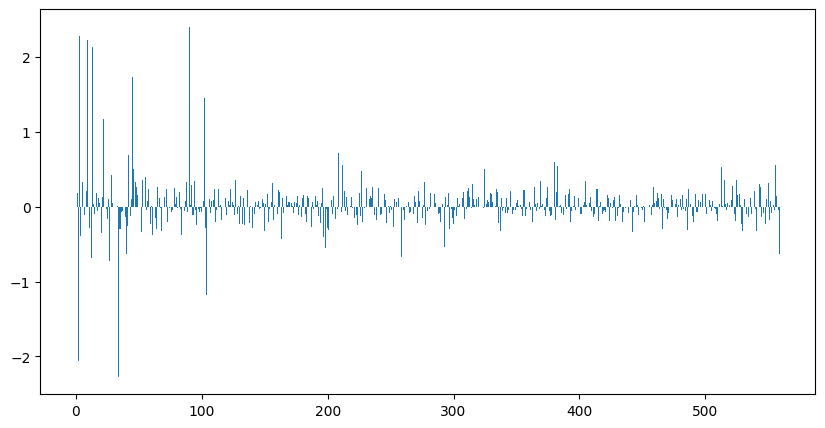

In [ ]:
# Inicijalizacija modela
lasso_model_2 = Lasso(alpha=0.01)

#Obuka
lasso_model_2.fit(x_inter_train, y_train)

# Testiranje
y_predicted = lasso_model_2.predict(x_inter_val)

# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_val, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model_2.coef_)),lasso_model_2.coef_)
print("koeficijenti: ", lasso_model_2.coef_)

In [ ]:
len(songs[songs['track_popularity'] == 0])
songs['track_popularity'].value_counts()

track_popularity
57     541
51     514
60     514
54     514
52     506
58     503
56     497
55     492
61     492
63     483
53     472
62     470
67     468
59     467
65     462
69     443
66     441
68     425
64     424
70     410
71     408
73     357
74     353
72     339
76     334
77     326
75     306
79     265
78     224
83     183
80     172
81     167
82     126
84     122
85     120
88     104
86      91
87      89
90      59
91      58
93      44
94      37
98      36
92      27
89      27
97      22
95      15
96       7
99       4
100      2
Name: count, dtype: int64